## Introduction to Dynamic Time Warping (DTW)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from dtaidistance import dtw
from typing import Dict, List

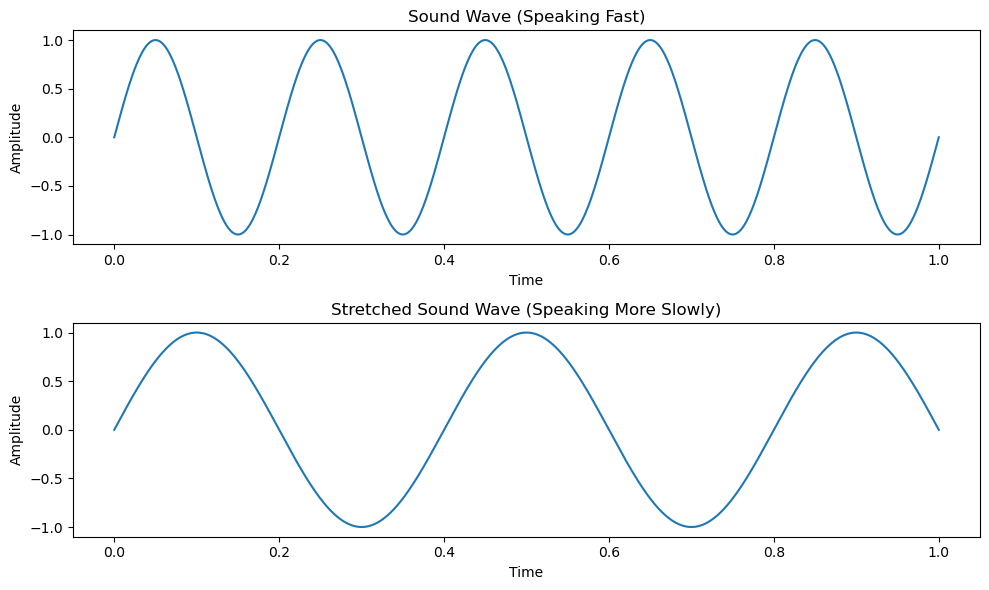

In [2]:
# Generating a simple sound wave as an example
t = np.linspace(0, 1, 1000)
sound_wave_fast = np.sin(2 * np.pi * 5 * t)  # 5 Hz tone

# Stretching the sound wave to simulate speaking more slowly
# We'll simulate this by reducing the frequency
sound_wave_slow = np.sin(2 * np.pi * 2.5 * t)  # 2.5 Hz tone, half the original frequency

fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Plotting the fast speaking sound wave
axs[0].plot(t, sound_wave_fast)
axs[0].set_title('Sound Wave (Speaking Fast)')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')

# Plotting the stretched sound wave (speaking more slowly)
axs[1].plot(t, sound_wave_slow)
axs[1].set_title('Stretched Sound Wave (Speaking More Slowly)')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

Series A's length: 20
Series B's length: 30


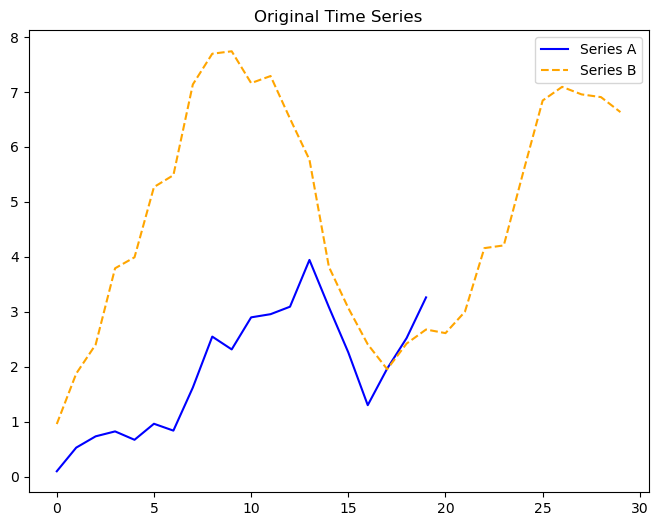

In [3]:
np.random.seed(0)
time_series_a = np.cumsum(np.random.rand(20) * 2 - 1)
time_series_b = np.cumsum(np.random.rand(30) * 2 - 1 
                          + np.sin(np.linspace(0, 3 * np.pi, 30)))

print(f"Series A's length: {len(time_series_a)}")
print(f"Series B's length: {len(time_series_b)}")

# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plotting the time series
ax1.plot(time_series_a, label='Series A', color='blue')
ax1.plot(time_series_b, label='Series B', linestyle='--', color='orange')

# Setting the title and legend
ax1.set_title('Original Time Series')
ax1.legend()

plt.show()

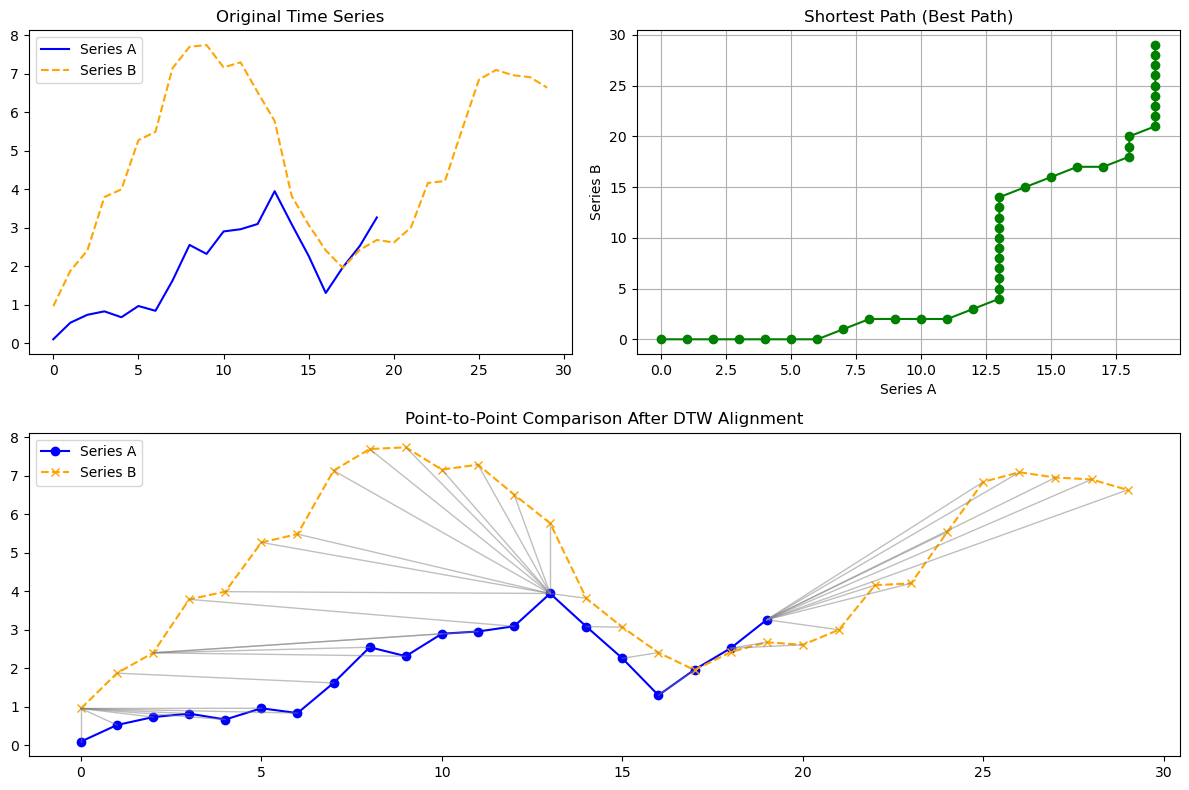

In [4]:
distance, paths = dtw.warping_paths(
    time_series_a, time_series_b, use_c=False)
best_path = dtw.best_path(paths)
similarity_score = distance / len(best_path)

plt.figure(figsize=(12, 8))

# Original Time Series Plot
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.plot(time_series_a, label='Series A', color='blue')
ax1.plot(time_series_b, label='Series B', linestyle='--',color='orange')
ax1.set_title('Original Time Series')
ax1.legend()

# Shortest Path Plot (Cost Matrix with the path)
# In this example, only the path is plotted, not the entire cost matrix.
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.plot(np.array(best_path)[:, 0], np.array(best_path)[:, 1], 
         'green', marker='o', linestyle='-')
ax2.set_title('Shortest Path (Best Path)')
ax2.set_xlabel('Series A')
ax2.set_ylabel('Series B')
ax2.grid(True)

# Point-to-Point Comparison Plot
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3.plot(time_series_a, label='Series A', color='blue', marker='o')
ax3.plot(time_series_b, label='Series B', color='orange', marker='x', linestyle='--')
for a, b in best_path:
    ax3.plot([a, b], [time_series_a[a], time_series_b[b]], color='grey', linestyle='-', linewidth=1, alpha = 0.5)
ax3.set_title('Point-to-Point Comparison After DTW Alignment')
ax3.legend()

plt.tight_layout()
plt.show()

In [5]:
results_df = pd.DataFrame({
    'Metric': ['DTW Similarity Score'],
    'Value': [similarity_score]
})

results_df['Description'] = [
    "Lower scores indicate greater similarity between the time series."
]

results_df

,Metric,Value,Description
0,DTW Similarity Score,0.306018,Lower scores indicate greater similarity betwe...


## Application

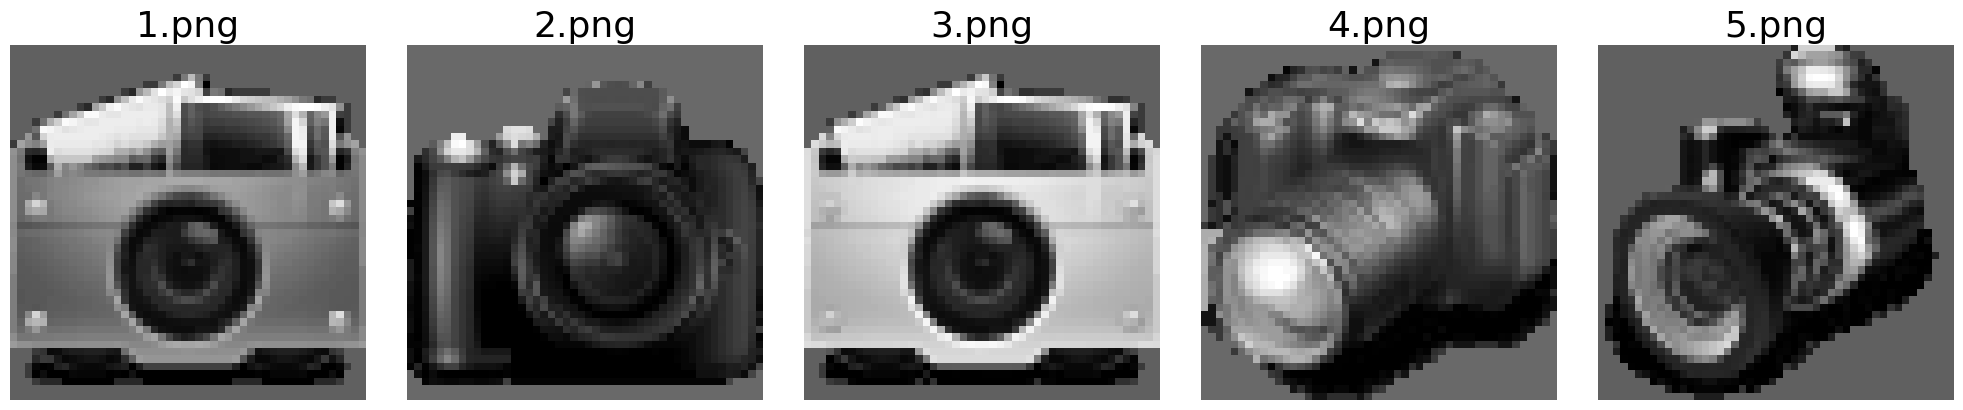

In [6]:
# Dictionary to store the image data
data: Dict[str, np.ndarray] = {}
# Get all image files
image_files: List[str] = os.listdir("./Images")#[:2]
# Create a plot for each image
fig, axs = plt.subplots(1, len(image_files), figsize=(20, 4))

# Load and display each image
for idx, image_file in enumerate(image_files):
    # Open the image
    image = Image.open(f"./Images/{image_file}")

    # Check if the image has transparency (RGBA or palette with transparency)
    if image.mode in ('RGBA', 'P'):
        # Convert to RGBA first to handle transparency
        image = image.convert('RGBA')
        # Remove the alpha channel by converting to 'L' (grayscale)
        image = image.convert('L')
    else:
        # If no transparency, directly convert to grayscale
        image = image.convert('L')
    
    # Convert the image to a numpy array
    image_data = np.array(image, dtype=np.float_) / 255.0
    # Store the image data as 1D array in the dictionary
    data[image_file] = image_data.flatten()
    
    # Show the image
    axs[idx].imshow(image_data, cmap='gray')
    axs[idx].axis('off')
    axs[idx].set_title(image_file, fontsize=26)

plt.tight_layout()
plt.show();

#### Example#1

In [7]:
# Select an image for reference
reference: str = "1.png"

# Apply DTW to find the similarity between the reference image and all other images
similarity_scores: Dict[str, float] = {}
for image_name, image_data in data.items():
    distance, paths = dtw.warping_paths(data[reference], image_data, use_c=False)
    best_path = dtw.best_path(paths)
    similarity_score = distance / len(best_path)
    similarity_scores[image_name] = similarity_score

# Display the similarity scores
similarity_scores_df = pd.DataFrame(similarity_scores.items(), 
                                    columns=['Image', 'DTW Similarity Score'])
similarity_scores_df = similarity_scores_df.sort_values(by='DTW Similarity Score')

# Display the similarity scores
print(f"With `{reference}` as the reference image, the similarity scores are:")
similarity_scores_df

With `1.png` as the reference image, the similarity scores are:


,Image,DTW Similarity Score
0,1.png,0.000000
1,2.png,0.001458
4,5.png,0.001494
3,4.png,0.001496
2,3.png,0.001741


#### Example#2

In [8]:
# Select an image for reference
reference: str = "5.png"

# Apply DTW to find the similarity between the reference image and all other images
similarity_scores: Dict[str, float] = {}
for image_name, image_data in data.items():
    distance, paths = dtw.warping_paths(data[reference], image_data, use_c=False)
    best_path = dtw.best_path(paths)
    similarity_score = distance / len(best_path)
    similarity_scores[image_name] = similarity_score

# Display the similarity scores
similarity_scores_df = pd.DataFrame(similarity_scores.items(), 
                                    columns=['Image', 'DTW Similarity Score'])
similarity_scores_df = similarity_scores_df.sort_values(by='DTW Similarity Score')

# Display the similarity scores
print(f"With `{reference}` as the reference image, the similarity scores are:")
similarity_scores_df

With `5.png` as the reference image, the similarity scores are:


,Image,DTW Similarity Score
4,5.png,0.000000
1,2.png,0.001448
3,4.png,0.001473
0,1.png,0.001494
2,3.png,0.001695
